# Value of A Firm Based on R&D Expenditures Discussion
The following is linear regression exercise bases on Illustration 4.1

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [62]:
#Based on the graph in Illistration 4.1, I esitmated the X and Y values on the graph 
#Once the values were estimated I created Varaible lists to represent the R&D Expense and Earnings Return (ROI)
RD_Expense = ([.5,.67,1,2.3,2.5,3,3.3,3.75,4,4.67,5.5,6,6.1,6.5,7,8.33,8.5,8.75,9.25,9.5])
ROI = ([5.8,7,8,6,6,6.25,10,8.1,10,8.2,13,8.2,11,7,11,13,13.1,11.1,9.8,16])

In [63]:
#The following is a print out to indicate the values associated with each varibale
print(*RD_Expense)
print(*ROI)

0.5 0.67 1 2.3 2.5 3 3.3 3.75 4 4.67 5.5 6 6.1 6.5 7 8.33 8.5 8.75 9.25 9.5
5.8 7 8 6 6 6.25 10 8.1 10 8.2 13 8.2 11 7 11 13 13.1 11.1 9.8 16


In [89]:
#NExt I cerated a DataFrame (think Excel Spreadsheet) from the data points so the data woulsd be easier to work with
#When a Pandas DataFrame is created, the DataFrame creates number values for each record.

DataFrame = pd.DataFrame({'RD_Expenditures':RD_Expense, "Price_to_Earnings_Return": ROI})
print(DataFrame)

    RD_Expenditures  Price_to_Earnings_Return
0              0.50                      5.80
1              0.67                      7.00
2              1.00                      8.00
3              2.30                      6.00
4              2.50                      6.00
5              3.00                      6.25
6              3.30                     10.00
7              3.75                      8.10
8              4.00                     10.00
9              4.67                      8.20
10             5.50                     13.00
11             6.00                      8.20
12             6.10                     11.00
13             6.50                      7.00
14             7.00                     11.00
15             8.33                     13.00
16             8.50                     13.10
17             8.75                     11.10
18             9.25                      9.80
19             9.50                     16.00


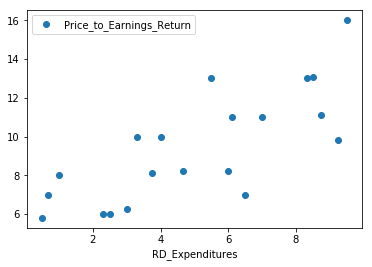

In [90]:
#Next I plotted the data to indicate that my inputs match the data in the book

DataFrame.plot(x='RD_Expenditures', y='Price_to_Earnings_Return', style='o' )

In [141]:
#Import the linear regression library 

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [142]:
#Then I renamed the cloumn names into X and y varaibles so they would be easier to work with

X = DataFrame['RD_Expenditures'].values.reshape(-1,1)
y = DataFrame['Price_to_Earnings_Return'].values.reshape(-1,1)

In [189]:
#Next I split the data into train and test sets
#We will use 80% of the data points (16 data points) to test our predicted regression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=.2)

In [190]:
#This code runs the regression on our 16 data points

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [191]:
#Based on the algorith the y intercept is 5.6
#This mirrors the book's data set as the blue line in Illustration 4.1 also has the Y intercept just below 6
#The second number (~.71) indicates that the line move in the positive direction as also indicated in Illustration 4.1
#The Regession Coefficient here indicates that for every one unit of change in the R&D Expenditures -- The firms earnings 
#increse by .71

print(regressor.intercept_)
print(regressor.coef_)

[5.61052996]
[[0.70922782]]


In [192]:
#The above shows that for every one unit of change in R&D expenditures the change in Earnigns is .7%-.75%

In [193]:
y_pred = regressor.predict(X_test)

In [200]:
#The prediction below indicates that for the remaining 4 data points that we have not run through our training model we
#can see how well our model has predicted their values based on the previously trained 16 data points
#We can see that our model is pretty acurate in guessing the value of the data points based on the linear regression line
df = pd.DataFrame({"Actual": y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,13.1,11.638966
1,13.0,9.511283
2,6.0,7.241754
3,7.0,6.085713


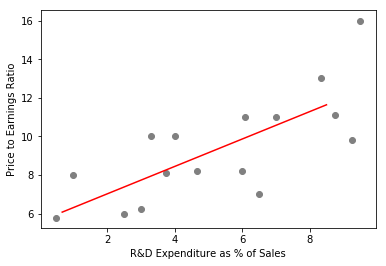

In [201]:
#Here is a print out of the linear regression line based on the 16 data points we trained the model with

#TRAINING SET
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_test, y_pred, color='red')
plt.xlabel("R&D Expenditure as % of Sales")
plt.ylabel("Price to Earnings Ratio")
plt.show()


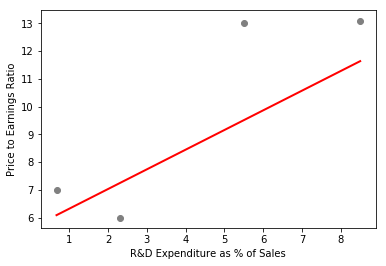

In [202]:
#TESTING SET (PREDICTION)
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("R&D Expenditure as % of Sales")
plt.ylabel("Price to Earnings Ratio")
plt.show()

In [197]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  1.7764480015253172
Mean Squared Error:  4.1709100507507575
Root Mean Squared Error:  2.0422806003952436
